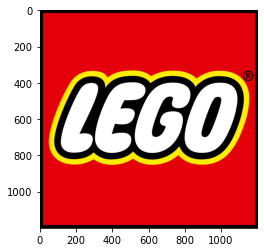

In [14]:
# https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv

import numpy as np
import cv2
from matplotlib import pyplot as plt

# img = cv2.imread("../img/eardrops.jpg")
img = cv2.imread("../img/lego.png")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [22]:
# K Means clustering

# Convert to float32 array of N x 3, where each row is a pixel (R, G, B)
pixels = np.float32(img.reshape(-1, 3))

K = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, K, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

average = img.mean(axis=0).mean(axis=0)
dominant = palette[np.argmax(counts)]
print(average)
print(dominant)

[194.55742361  58.04794653  50.38976111]
[2.2530176e+02 9.7423598e-02 1.0995276e+01]


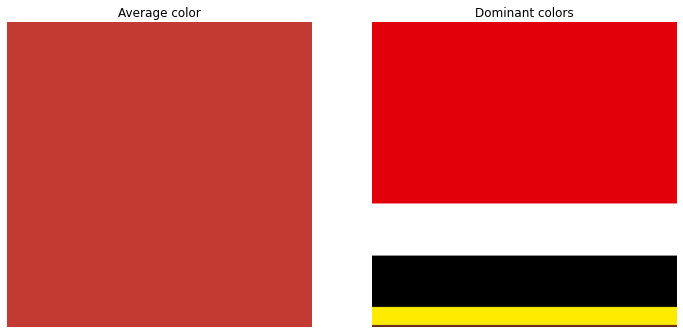

In [20]:
avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)

indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
rows = np.int_(img.shape[0]*freqs)

dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
    
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)